# Explore here

In [1]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import jinja2

In [2]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_raw.to_csv('../data/raw/raw.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
#Let's take a sample of the Data
data_raw.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29149,22379701,Private room + full bathroom / lots of sun + dogs,92649019,Sophie,Brooklyn,Crown Heights,40.66921,-73.92624,Private room,68,6,48,2019-06-29,2.59,1,0
33317,26325637,Comfortable one bedroom apartment,47718147,Shalisa,Brooklyn,Bedford-Stuyvesant,40.69150,-73.94327,Entire home/apt,100,1,30,2019-06-30,2.50,1,176
18669,14774206,South-By-Southwest Room,92193254,Max,Manhattan,Upper West Side,40.80093,-73.96010,Private room,97,3,96,2019-07-06,2.80,1,134
11817,9196408,Large Sunny Room in West Harlem,47838741,Ibrahima,Manhattan,Harlem,40.82411,-73.94404,Private room,65,5,2,2016-01-05,0.05,1,159
45557,34832415,Gay friendly,6503950,Rob,Brooklyn,Bushwick,40.69339,-73.90588,Private room,50,1,6,2019-06-30,4.74,2,311
37130,29515916,* Modern Private BR in the Heart of Williamsbu...,7268300,Arianna,Brooklyn,Williamsburg,40.71204,-73.96541,Private room,80,4,3,2019-05-28,0.48,1,7
45934,35005183,Sonder | 116 John | Comfortable Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70811,-74.00616,Entire home/apt,100,29,0,NaN,NaN,327,333
799,285492,Amazing 1 bedroom apt with NYC View,1486034,Eric,Manhattan,Chelsea,40.74494,-73.99980,Entire home/apt,385,1,63,2018-08-03,0.71,1,364
45643,34869328,Whole house next to 2/5 trains- 30min to Manha...,293911,Sergios & Fani,Brooklyn,East Flatbush,40.64521,-73.94452,Entire home/apt,220,5,0,NaN,NaN,1,75
18296,14351787,1 room in Chic Apt in Astoria NYC,49620552,Raul,Queens,Astoria,40.76933,-73.91165,Private room,55,1,20,2019-06-27,0.63,4,252


In [65]:
#Create a copy of the dataset to clean up
df_processed = data_raw.copy()

In [66]:
df_processed = df_processed.drop(['id','latitude','longitude','last_review','name'], axis= 1)

df_processed['neighbourhood_group'] = pd.Categorical(df_processed['neighbourhood_group'])

df_processed['neighbourhood'] = pd.Categorical(df_processed['neighbourhood'])

df_processed['room_type'] = pd.Categorical(df_processed['room_type'])





In [67]:
df_processed.to_csv('../data/processed/processed.csv')
df = df_processed.copy()

In [69]:
df.sample(10)

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11399,46365876,Josefine,Manhattan,East Village,Entire home/apt,125,2,2,0.06,1,0
16765,16437254,Benjamin,Brooklyn,Boerum Hill,Entire home/apt,120,30,7,0.38,21,342
35547,7592992,Sam,Brooklyn,Prospect Heights,Private room,90,1,0,NaN,1,0
38193,215531390,Annie Veronique,Manhattan,Hell's Kitchen,Entire home/apt,269,4,6,0.92,1,43
25644,146620661,Mary,Manhattan,Upper East Side,Entire home/apt,200,5,4,0.18,1,0
26267,15487773,Sorcha,Manhattan,Chelsea,Private room,100,2,4,0.19,1,0
25359,31687922,Jonathan,Queens,Flushing,Entire home/apt,120,1,104,4.44,1,90
45891,263670476,Algerchaabi,Brooklyn,Bay Ridge,Entire home/apt,1800,30,0,NaN,1,335
40110,232283561,Beverline,Bronx,East Morrisania,Private room,125,1,9,1.46,3,80
26812,25265179,Veronica,Manhattan,Nolita,Entire home/apt,250,1,9,0.75,1,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  int64   
 1   host_name                       48874 non-null  object  
 2   neighbourhood_group             48895 non-null  category
 3   neighbourhood                   48895 non-null  category
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   reviews_per_month               38843 non-null  float64 
 9   calculated_host_listings_count  48895 non-null  int64   
 10  availability_365                48895 non-null  int64   
dtypes: category(3), float64(1), int64(6), object(1)
memory usage: 3.2+ MB


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00,7822033.00,30793816.00,1.074344e+08,274321313.0
price,48895.0,1.527207e+02,2.401542e+02,0.00,69.00,106.00,1.750000e+02,10000.0
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00,1.00,3.00,5.000000e+00,1250.0
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00,1.00,5.00,2.400000e+01,629.0
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01,0.19,0.72,2.020000e+00,58.5
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00,1.00,1.00,2.000000e+00,327.0
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00,0.00,45.00,2.270000e+02,365.0


In [72]:
df['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

In [73]:
df['host_name'].value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [74]:
#From the previous two value_counts from 'host_id' and 'host_name' it is possible to defer that multiple two or more hosts have the same name.
#Let's confirm with an example for the Name 'Michael'

df[df.host_name == 'Michael']['host_id'].value_counts()

host_id
7245581      19
100238132    12
271393608     6
36889012      4
99392252      4
             ..
18362341      1
14476679      1
23269511      1
25116430      1
151831356     1
Name: count, Length: 335, dtype: int64

In [75]:
#From this result, it is confirmed that the 'host_id' will be required to diferentiated between hosts. Name will not work.

#Value counts for 'host_id' column shows that a single host can have multiple airbnb's. For example, the Host host_id='219517861' owns the biggest quantities of Airbnbs.

df[df.host_id == 219517861]['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        327
Bronx              0
Brooklyn           0
Queens             0
Staten Island      0
Name: count, dtype: int64

In [76]:
grouped_reviews = df.groupby(['host_id'])['number_of_reviews'].sum().reset_index()
grouped_reviews.sort_values('number_of_reviews', ascending=False)

,host_id,number_of_reviews
21316,37312959,2273
1052,344035,2205
18636,26432133,2017
20884,35524316,1971
21934,40176101,1818
...,...,...
31250,140338526,0
17927,24508767,0
31248,140323391,0
31247,140312311,0


In [77]:
# The host with the most number of reviews is host_id = '37312959'. While some other hosts haven't receive any reviews.

# Let's analyse the areas

In [78]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

/workspaces/data-processing-project-tutorial/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspaces/data-processing-project-tutorial/.env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


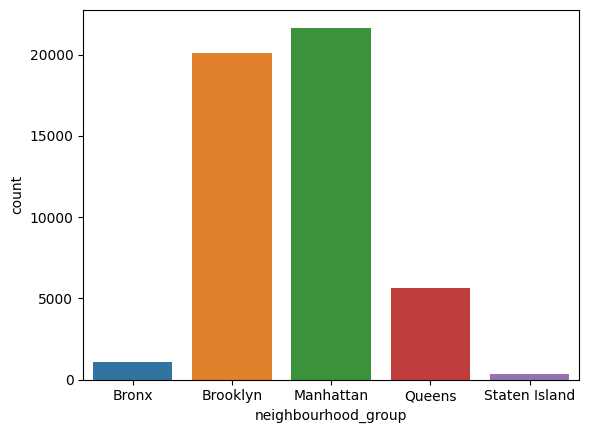

In [79]:
sns.countplot(data = df, x = 'neighbourhood_group')
plt.show()

In [80]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: count, Length: 221, dtype: int64

In [81]:
# The Data set contains 5 different neighbourhood groups. And 221 different neighbourhoods. The neighbourhood groups that offers most airbnb options is Manhattan,
# with an offer of 21661 places, while Staten Island offers only 373.

# The neighbourhood with the most offers for Airbnb is Williamsburg, with 3920. While multiple neighbourhood's offer a single Aribnb option.

In [82]:
df.groupby(['neighbourhood_group'])['price'].mean().sort_values()

/tmp/ipykernel_62075/2761619830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group'])['price'].mean().sort_values()


neighbourhood_group
Bronx             87.496792
Queens            99.517649
Staten Island    114.812332
Brooklyn         124.383207
Manhattan        196.875814
Name: price, dtype: float64

/tmp/ipykernel_62075/3545132381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group'])['price'].mean().sort_values().plot(kind='bar')


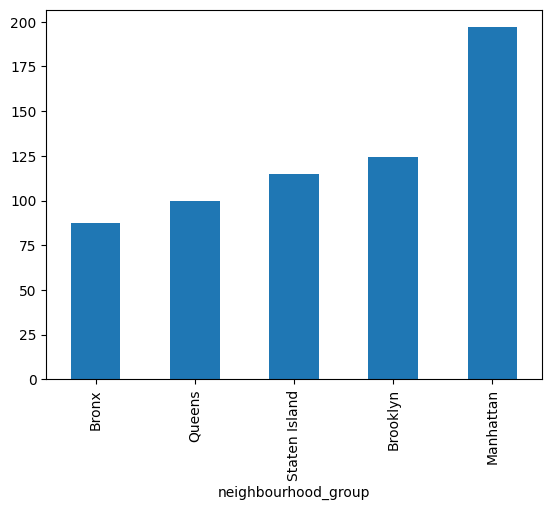

In [83]:
df.groupby(['neighbourhood_group'])['price'].mean().sort_values().plot(kind='bar')
plt.show()

In [84]:
# The cheapest Neighbourhood Group is Bronx, with $87.50 per night, on average. The most expensive Neighbourhood Group is Manhattan, with an average of $196.87 per night.

In [85]:
df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().sort_values()

/tmp/ipykernel_62075/1092395844.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().sort_values()


neighbourhood_group  neighbourhood  
Staten Island        Bull's Head        47.333333
Bronx                Hunts Point        50.500000
                     Tremont            51.545455
                     Soundview          53.466667
Staten Island        New Dorp           57.000000
                                          ...    
                     Williamsburg             NaN
                     Windsor Terrace          NaN
                     Woodhaven                NaN
                     Woodlawn                 NaN
                     Woodside                 NaN
Name: price, Length: 1105, dtype: float64

In [86]:
#Staten Island contains both the most expesive and the cheapest neighbourhood. Bull's head with an average of $47.33 per night, and Fort Wadsworth with an average of $800 per night.

In [87]:
df.groupby(['neighbourhood_group'])['availability_365'].mean().sort_values()

/tmp/ipykernel_62075/4027703684.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group'])['availability_365'].mean().sort_values()


neighbourhood_group
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Bronx            165.758937
Staten Island    199.678284
Name: availability_365, dtype: float64

/tmp/ipykernel_62075/2094422704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group'])['availability_365'].mean().sort_values().plot(kind='bar')


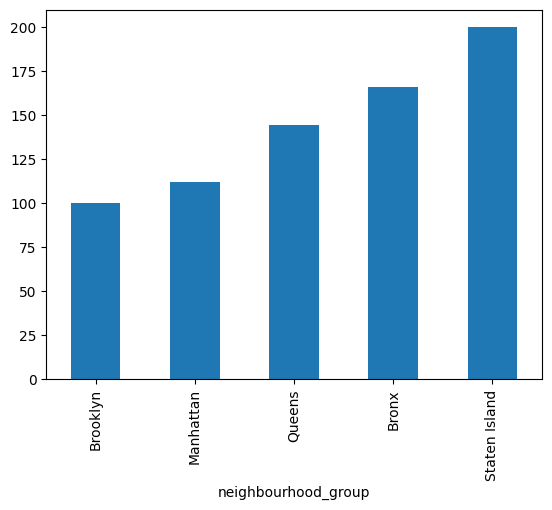

In [88]:
df.groupby(['neighbourhood_group'])['availability_365'].mean().sort_values().plot(kind='bar')
plt.show()

In [89]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts()

/tmp/ipykernel_62075/1717237381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group'])['room_type'].value_counts()


neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: count, dtype: int64

In [90]:
#The Busiest hosts belong to the Brooklyn Neighbourhood Group. Because it contains the minimum availability per year. Brooklyn is the second most expensive Neighbourhood Group,
# and it is not the place with most Airbnb places.

In [91]:
df.groupby(['room_type'])['availability_365'].mean()

/tmp/ipykernel_62075/1594702225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['room_type'])['availability_365'].mean()


room_type
Entire home/apt    111.920304
Private room       111.203933
Shared room        162.000862
Name: availability_365, dtype: float64

In [92]:
df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean()

/tmp/ipykernel_62075/720588353.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean()


neighbourhood_group  room_type      
Bronx                Entire home/apt    158.000000
                     Private room       171.331288
                     Shared room        154.216667
Brooklyn             Entire home/apt     97.205147
                     Private room        99.917983
                     Shared room        178.007264
Manhattan            Entire home/apt    117.140996
                     Private room       101.845026
                     Shared room        138.572917
Queens               Entire home/apt    132.267176
                     Private room       149.222716
                     Shared room        192.186869
Staten Island        Entire home/apt    178.073864
                     Private room       226.361702
                     Shared room         64.777778
Name: availability_365, dtype: float64

In [93]:
#In general, the hosts that offer Private Rooms will be the bussiest. But when analysing each neighbourhood group by, the preferences of the users chage depeding on the neighbourhood group.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  int64   
 1   host_name                       48874 non-null  object  
 2   neighbourhood_group             48895 non-null  category
 3   neighbourhood                   48895 non-null  category
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   reviews_per_month               38843 non-null  float64 
 9   calculated_host_listings_count  48895 non-null  int64   
 10  availability_365                48895 non-null  int64   
dtypes: category(3), float64(1), int64(6), object(1)
memory usage: 3.2+ MB


In [103]:
df.corr(numeric_only=True)

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
price,0.015309,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.017364,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.140106,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.296417,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.154950,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.203492,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [ ]:
#The previous code shows that the price have a weak coorelation with: minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count and	availability_365